In [15]:
#Parte I y II
import pandas as pd
df = pd.read_csv('../data/retail_sales_dataset.csv')
df.head(10)
df.tail(5)
df.info()
df.describe()
df.dtypes
df['Product Category'].value_counts()
#Respecto al item de mostrar los valores unicos de la columna tienda, no existe la columna tienda.
df[df['Total Amount']>50]
df[df['Total Amount']<0.5]
df.query("`Product Category` == 'Manzana' & `Total Amount` > 30") 
df[['Product Category','Total Amount']] 
df.loc[5:10,'Product Category']
df.iloc[0:5,0:3]



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


,Transaction ID,Date,Customer ID
0,1,2023-11-24,CUST001
1,2,2023-02-27,CUST002
2,3,2023-01-13,CUST003
3,4,2023-05-21,CUST004
4,5,2023-05-06,CUST005


In [16]:
#Parte III
#Clasificacion de las ventas en categorias
df['Clasificacion_Ventas'] = pd.cut(df['Total Amount'], bins=[0,60,900,2000], labels=['Alta', 'Media', 'Baja'], right=False)
df['Clasificacion_Ventas']
#Convertir la columna date a datetime
df['Date'] = pd.to_datetime(df['Date'])
# Agrupar por genero y categoria
df.groupby('Gender')['Product Category'].value_counts().unstack()
# Agrupar por producto y mes
df['Mes']=df['Date'].dt.month
df.groupby('Product Category')['Mes'].value_counts().unstack()
#Agrupar por genero y total mount y galcular sum, min, max, std y var.
df.groupby('Gender')['Total Amount'].agg(['sum','min','max','std','var'])


,sum,min,max,std,var
Gender,,,,,
Female,232840,25,2000,554.299371,307247.792288
Male,223160,25,2000,566.433809,320847.259714


In [17]:
#Calculamos la media por cada grupo utilizando un transform para tener una serie del tamanho original del dataframe
category_avg = df.groupby('Product Category')['Total Amount'].transform('mean')
category_avg
#Hallamos la desviacion de cada venta con respecto a la media de su grupo
df['Deviation from Category Avg'] = df.apply(
    lambda row: row['Total Amount'] - category_avg[row.name], axis=1
)
df



,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Clasificacion_Ventas,Mes,Deviation from Category Avg
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Media,11,-317.475570
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Baja,2,556.752137
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Alta,1,-428.786550
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Media,5,56.752137
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Media,5,-367.475570
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,Alta,5,-393.247863
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,Media,11,-377.475570
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,Media,10,-367.475570
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,Media,12,-308.786550


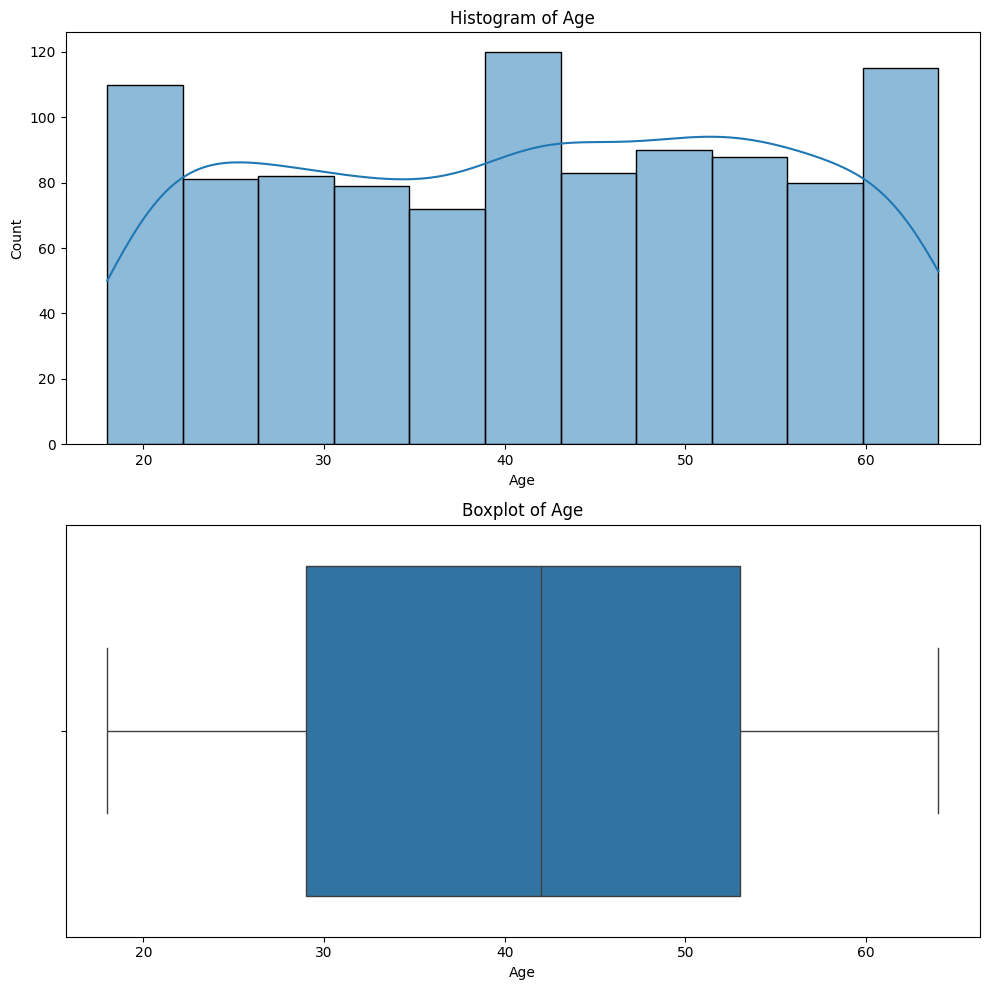

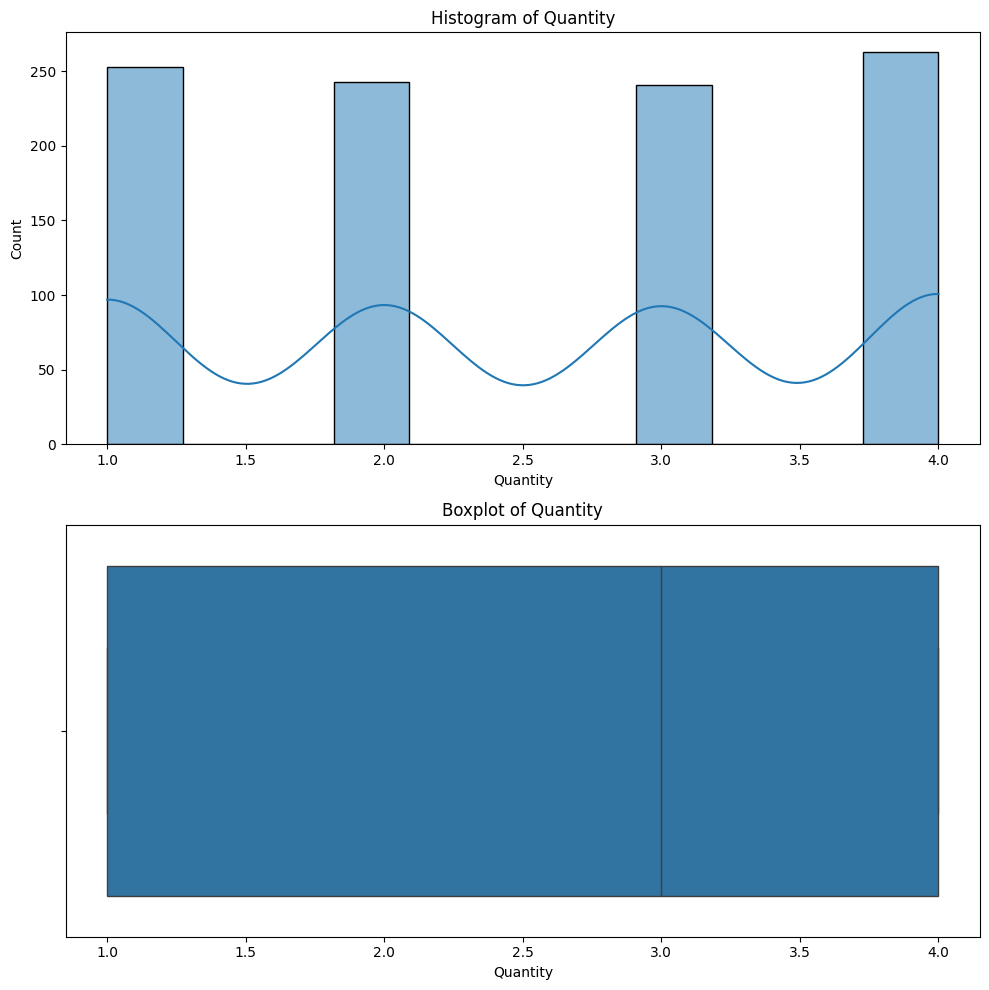

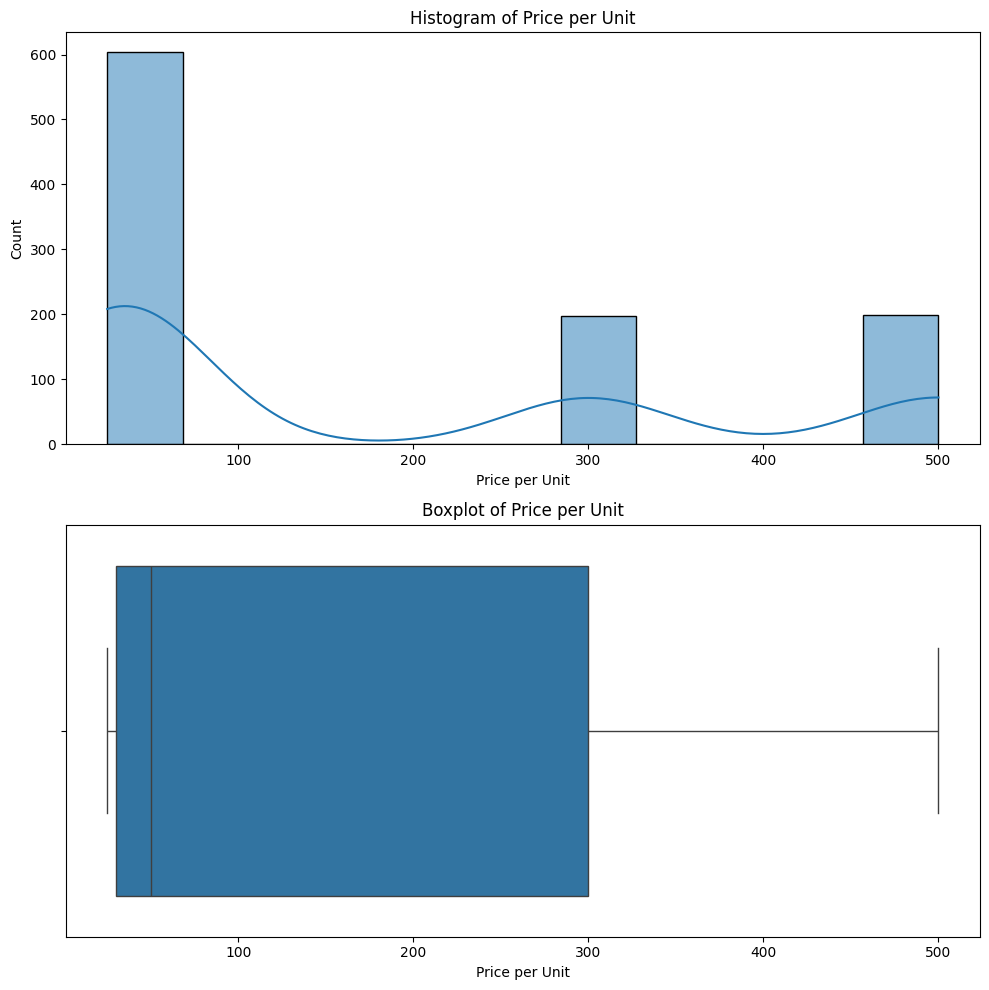

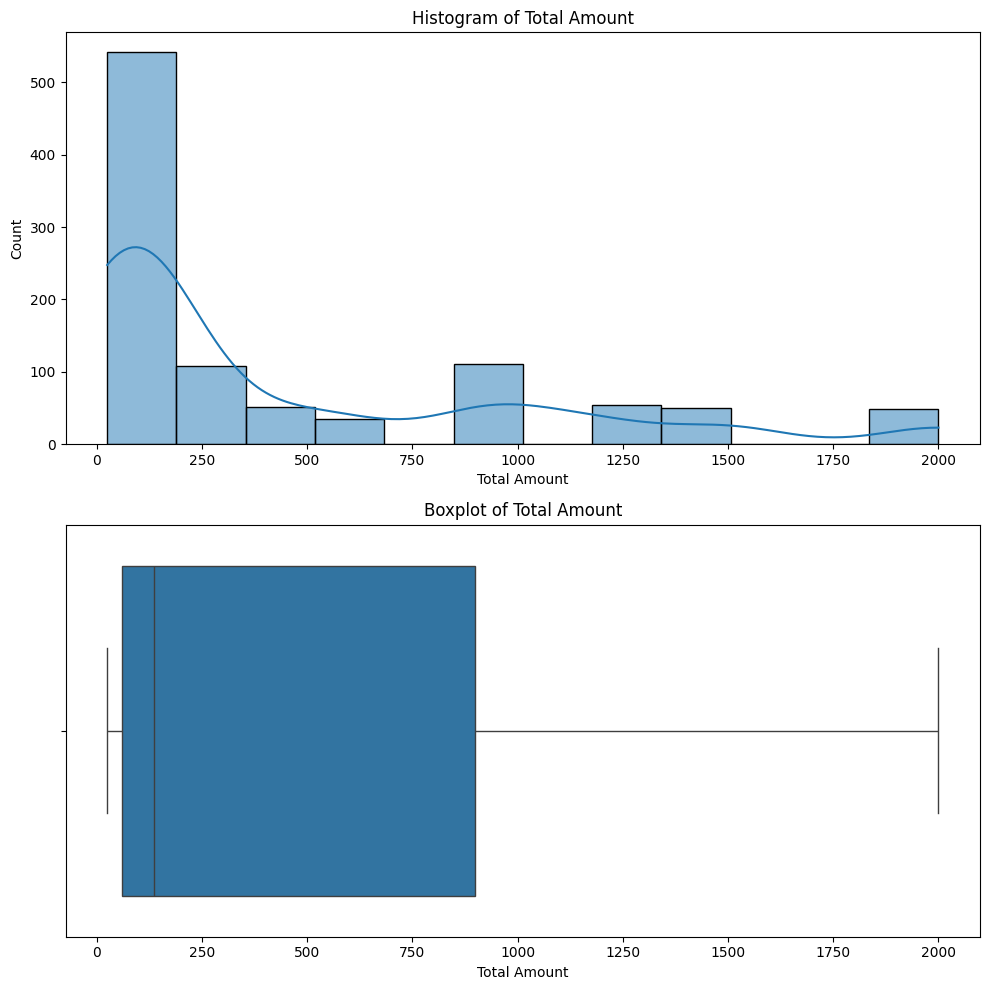

In [18]:
#Parte IV
import matplotlib.pyplot as plt
import seaborn as sns
columnas_numericas = ['Age', 'Quantity', 'Price per Unit', 'Total Amount']
for col in columnas_numericas:
    plt.figure(figsize=(10, 10))
    plt.subplot(2, 1, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')

    plt.subplot(2, 1, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()


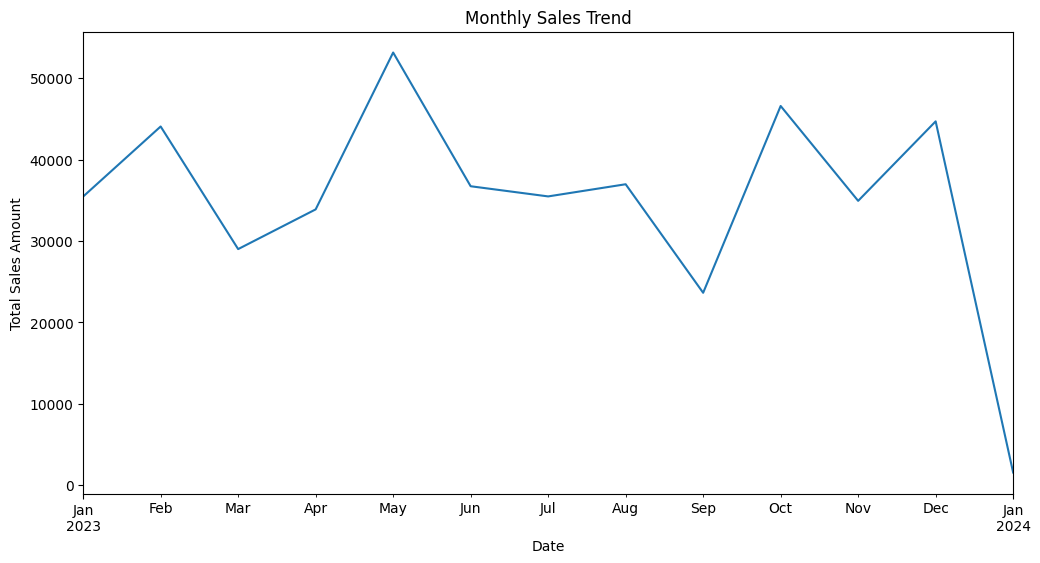

In [24]:
# Graficar la tendencia de ventas mensuales
ventas_mensuales = df.groupby(df['Date'].dt.to_period("M"))['Total Amount'].sum()
plt.figure(figsize=(12, 6))
ventas_mensuales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales Amount")
plt.show()

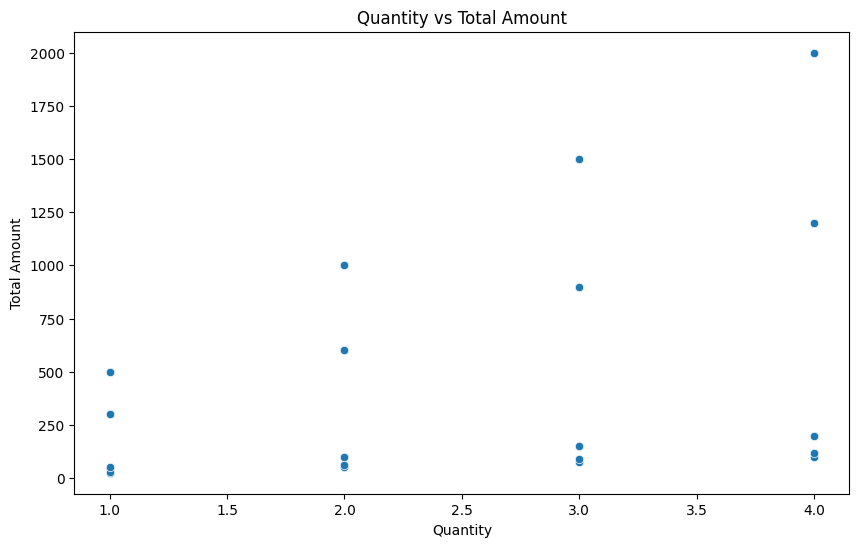

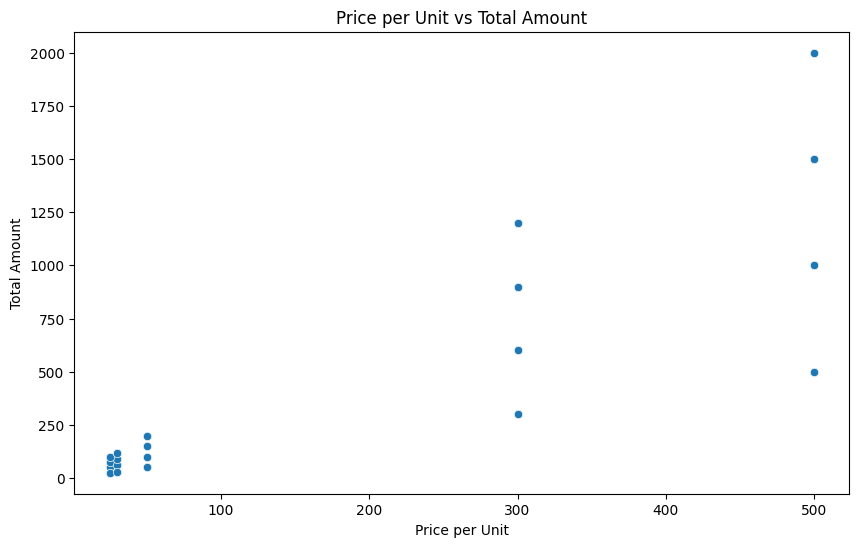

In [26]:
#Diagramas de dispersion
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Quantity'], y=df['Total Amount'])
plt.title("Quantity vs Total Amount")
plt.xlabel("Quantity")
plt.ylabel("Total Amount")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Price per Unit'], y=df['Total Amount'])
plt.title("Price per Unit vs Total Amount")
plt.xlabel("Price per Unit")
plt.ylabel("Total Amount")
plt.show()